### 1. 回归问题
    1. 用pytorch预测一下房价


In [1]:
import sklearn
from sklearn import datasets
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import f1_score

In [2]:
data=datasets.load_boston()
x=data.data
y=data.target
x=torch.from_numpy(x).float()
y=torch.from_numpy(y).float().view(-1,1)

model=nn.Sequential(
    nn.Linear(13,13),
    nn.ReLU(),
    nn.Linear(13,1)
)
loss_fn=nn.MSELoss(size_average=False)
optimizer=torch.optim.Adadelta(model.parameters(),lr=1e-3)


In [3]:
for i in range(100000):    
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()
    if i%10000==0:
        print(loss.item())
    

199139.21875
15156.6474609375
11790.115234375
9816.8193359375
9307.0888671875
9098.0849609375
8985.759765625
8874.5361328125
8724.7080078125
8577.89453125


* 画图，看一下效果

In [4]:
import matplotlib.pyplot as plt
model.eval()
with torch.no_grad():
    y_pred=model(x)

plt.plot(np.array(torch.squeeze(y)))
plt.plot(np.array(y_pred.detach().numpy()))
plt.show()

#### 1.2variable *VS* tensor
* 需要求导的一定要在Variable 里设置,requires_grad=True
* tensor是不能求导的

In [64]:
t1=Variable(torch.tensor([1,2,3]).float(),requires_grad=True)
t2=torch.tensor([1,2,3]).float()
z=torch.sum(t1**2)

In [65]:
#z.zero_grad()
z.backward()
t1.grad

tensor([ 2.,  4.,  6.])

## 1.3 sklearn 

In [9]:
from sklearn import linear_model

In [10]:
x=data.data
y=data.target
clf=linear_model.LinearRegression()
clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_pred=clf.predict(x)

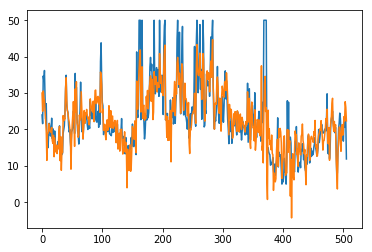

In [12]:
plt.plot(y)
plt.plot(y_pred)
plt.show()

# 4. 分类问题
* iris

In [5]:
data=datasets.load_iris()
x0=data.data
y0=data.target.reshape(-1,1)
x=torch.from_numpy(x0).float()
oh=sklearn.preprocessing.OneHotEncoder()
y=oh.fit_transform(y0).toarray()
y=torch.from_numpy(y).long()

In [7]:
x.shape,y.shape

(torch.Size([150, 4]), torch.Size([150, 3]))

In [108]:
x=torch.from_numpy(x0).float()
oh=sklearn.preprocessing.OneHotEncoder()
y=oh.fit_transform(y0).toarray()
y=torch.from_numpy(y).long()

model=nn.Sequential(
    nn.Linear(4,13),
    nn.ReLU(),
    nn.Linear(13,3),
    nn.Softmax(dim=1),
)

loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=2e-2)

for i in range(1000):    
    y_pred=model(x)
    loss=loss_fn(y_pred,y.float())
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()
    if i%10000==0:
        print(i,loss.item())

0 0.2583487927913666


In [109]:
model.eval()
with torch.no_grad():
    y_pred=model(x)
y_pred=np.argmax(y.numpy(),axis=1)
(y_pred==y0.flatten()).mean()

1.0

### Bce

In [113]:
nn.BCEWithLogitsLoss?

In [123]:
x=torch.from_numpy(x0).float()
y=torch.tensor(y0).float()
#oh=sklearn.preprocessing.OneHotEncoder()
#y=oh.fit_transform(y0).toarray()
#y=torch.from_numpy(y).long()

model=nn.Sequential(
    nn.Linear(4,13),
    nn.ReLU(),
    nn.Linear(13,1),
    #nn.Softmax(dim=1),
)
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adadelta(model.parameters(),lr=2e-2)
for i in range(50000):    
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()
    if i%10000==0:
        print(i,loss.item())

0 1.6396912336349487
10000 -2595996928.0
20000 -143832146509824.0
30000 -1.588426996533166e+17
40000 -2.8046140291170697e+19


## 还是用交叉熵吧

In [124]:
model.eval()
with torch.no_grad():
    y_pred=model(x)
#y_pred=np.argmax(y.numpy(),axis=1)
#(y_pred==y0.flatten()).mean()

## 另外一个损失函数
CrossEntropyLoss

In [ ]:
y

In [143]:
x=torch.from_numpy(x0).float()
y=torch.tensor(y0.flatten()).long()
#oh=sklearn.preprocessing.OneHotEncoder()
#y=oh.fit_transform(y0).toarray()
#y=torch.from_numpy(y).long()

model=nn.Sequential(
    nn.Linear(4,13),
    nn.ReLU(),
    nn.Linear(13,3),
    nn.Softmax(dim=1),
)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=2e-2)
for i in range(50000):    
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()
    if i%10000==0:
        print(i,loss.item())

0 1.1544603109359741
10000 0.5793548226356506
20000 0.574205756187439
30000 0.5720359086990356
40000 0.5707725286483765


In [136]:
model.eval()
with torch.no_grad():
    y_pred=model(x)

In [137]:
y_pred.argmax(dim=1).numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [138]:
(y_pred.argmax(dim=1).numpy()==(y0.flatten())).mean()

0.98